![](../images/logos.jpg "MiCMOR, KIT Campus Alpin")

**[MiCMOR](https://micmor.kit.edu) [SummerSchool "Environmental Data Science: From Data Exploration to Deep Learning"](https://micmor.kit.edu/sites/default/files/MICMoR%20Summer%20School%202019%20Flyer.pdf)**  
IMK-IFU KIT Campus Alpin, Sept. 4 - 13 2019, Garmisch-Partenkirchen, Germany.

---

# ML algorithms: K-means (clustering, unsupervised learning)

In [30]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [83]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [65]:
def add_reference_plot(X, y, ax=None):
    if not ax:
        fig, ax = plt.subplots(1,1)
    # The true classification
    ax.scatter(X[y == 0, 0], X[y == 0, 1], s = 40, c = 'red', label = 'V1')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], s = 40, c = 'blue', label = 'V2')
    ax.scatter(X[y == 2, 0], X[y == 2, 1], s = 40, c = 'green', label = 'V3')
    ax.set_title('reference')
    ax.legend();


In [71]:
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target
print ("Data point", X.shape[0])
print("Features", X.shape[1])

# split the data to create a hold-out set for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

# call fit_transform on the traingin set, but only transform on the test set!
sc = StandardScaler()
Xt_train = sc.fit_transform(X_train)
Xt_test = sc.transform (X_test)

Xt = sc.fit_transform(X)

Data point 150
Features 4


### (1) Finding the optimum number of clusters for k-means classification (the 'elbow' method)

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) 
doesn't decrease significantly with every iteration

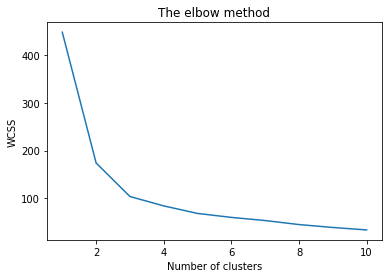

In [56]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Xt_train)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [72]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Xt)

We now want to calculate the accuracy of this classification agains the true labels. As k-means
does not know the true class it represents the labels can be in an wrong order. We fix this
by matching each learned cluster label with the true labels found in the data of this cluster.

In [73]:
# change the clusters to contain the majority of the true label contained so we can compare it better
from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(3):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]
    
accuracy_score(y, labels)

0.8333333333333334

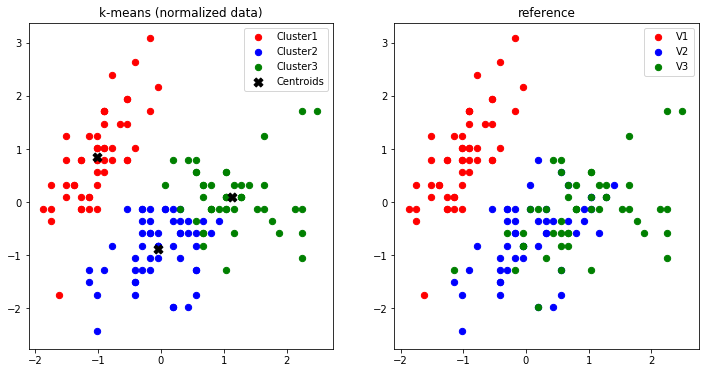

In [74]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].scatter(Xt[labels == 0, 0], Xt[labels == 0, 1], s = 40, c = 'red', label = 'Cluster1')
ax[0].scatter(Xt[labels == 1, 0], Xt[labels == 1, 1], s = 40, c = 'blue', label = 'Cluster2')
ax[0].scatter(Xt[labels == 2, 0], Xt[labels == 2, 1], s = 40, c = 'green', label = 'Cluster3')
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, c = 'black', label = 'Centroids', marker='X')
ax[0].set_title('k-means (normalized data)')
ax[0].legend();
add_reference_plot(Xt, y, ax=ax[1])

In [106]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=7,
                       cluster_std=0.7, random_state=0)

Now, let's pretent we do not know the number of true classes...

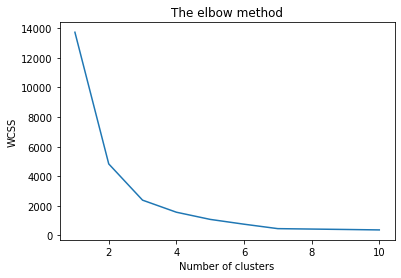

In [108]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

According to the elbow method the number should be between 6 and 8, probably 7...

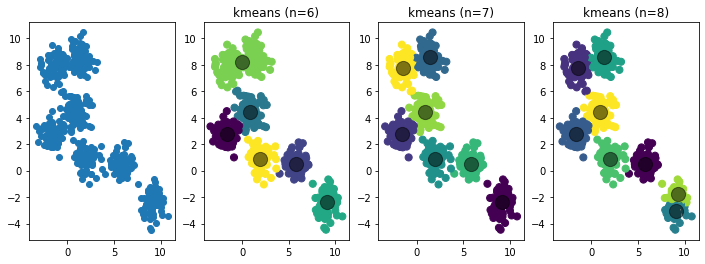

In [109]:
fig, ax = plt.subplots(1,4, figsize=(12,4))

ax[0].scatter(X[:, 0], X[:, 1])

for p, k in enumerate([6,7,8]):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    ax[p+1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    ax[p+1].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    ax[p+1].set_title(f'kmeans (n={k})')

Note that the visual inspection here is pretty straight forward since we are in 2D space
(features). As we often have many more features a visual inspection can be infeasible. We might employ dimension reduction techniques (i.e. PCA) to condense is down though...
